# Proyek Analisis Data: Bike-sharing-dataset
Nama: Annita Fadhilah Aprilia

Email: 22083010033@student.upnjatim.ac.id

ID Dicoding: annita_fadhilah

In [2]:
import pandas as pd

# Memuat dataset
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Ubah 'dteday' menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Gabungkan data (jika diperlukan, contoh ini menunjukkan cara menggabungkan pada 'dteday')
merged_data = pd.merge(day_data, hour_data, on='dteday', how='outer', suffixes=('_day', '_hour'))

# Simpan kumpulan data gabungan ke file CSV baru
merged_data.to_csv('combined_data.csv', index=False)

print("Dataset berhasil disimpan sebagai 'combined_data.csv'")

Dataset berhasil disimpan sebagai 'combined_data.csv'


# Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda selama hari kerja dibandingkan dengan akhir pekan, baik pada tingkat harian maupun jam-jam tertentu dalam sehari?

2. Apa pengaruh cuaca dan suhu terhadap jumlah pengguna sepeda di jam-jam tertentu, serta bagaimana hal ini berbeda antara hari kerja dan hari libur?

# Import Semua Packages/Library yang Digunakan

In [3]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

# Data Wrangling

**Gathering Data**

Memuat tabel kombinasi data day dan hour

In [5]:
combined_data = pd.read_csv("combined_data.csv")
combined_data

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Assessing Data**

Menilai Data kombinasi data day dan hour

In [6]:
# Memeriksa tipe data dari tiap kolom
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_day      17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_day       17379 non-null  int64  
 3   yr_day           17379 non-null  int64  
 4   mnth_day         17379 non-null  int64  
 5   holiday_day      17379 non-null  int64  
 6   weekday_day      17379 non-null  int64  
 7   workingday_day   17379 non-null  int64  
 8   weathersit_day   17379 non-null  int64  
 9   temp_day         17379 non-null  float64
 10  atemp_day        17379 non-null  float64
 11  hum_day          17379 non-null  float64
 12  windspeed_day    17379 non-null  float64
 13  casual_day       17379 non-null  int64  
 14  registered_day   17379 non-null  int64  
 15  cnt_day          17379 non-null  int64  
 16  instant_hour     17379 non-null  int64  
 17  season_hour 

In [7]:
# Mendeteksi missning values
combined_data.isna().sum()

instant_day        0
dteday             0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
instant_hour       0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
dtype: int64

In [8]:
# Mendeteksi duplikasi data
print("Jumlah duplikasi: ", combined_data.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Menampilkan ringkasan statistik
combined_data.describe()

,instant_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Cleaning Data**

In [10]:
# Menghilangkan duplicate data
combined_data.drop_duplicates(inplace=True)

In [11]:
print("Jumlah duplikasi: ", combined_data.duplicated().sum())

Jumlah duplikasi:  0


# Exploratory Data Analysis

In [78]:
# Menampilkan statistik deskriptif dari DataFrame 'combined_data' termasuk semua tipe data
combined_data.describe(include="all")

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan data penggunaan sepeda yang terdiri dari 17.379 entri, kolom `temp_hour` menunjukkan rata-rata suhu sebesar 0,4969 dengan rentang dari 0,0591 hingga 0,8617. Kolom `registered_hour` mencatat rata-rata jumlah pengguna terdaftar per jam sebanyak 153,79 orang, sedangkan kolom `casual_hour` menunjukkan rata-rata pengguna kasual sebanyak 35,68 orang. Total penggunaan sepeda per jam yang tercatat di kolom `cnt_hour` memiliki rata-rata 189,46 orang. Penggunaan sepeda lebih sering terjadi pada hari kerja, yang diindikasikan oleh kolom `workingday_hour`, dan cuaca cenderung cerah atau berawan seperti yang tercatat di kolom `weathersit_hour`, dengan variasi pengguna yang dipengaruhi oleh suhu dan waktu dalam sehari.

In [79]:
# Mengelompokkan data berdasarkan 'workingday_day' dan mengagregasi kolom yang relevan
combined_data.groupby(by="workingday_day").agg({
    "cnt_hour": "sum",  # Menghitung total jumlah penggunaan sepeda
    "temp_hour": ["mean", "max", "min"],  # Menghitung rata-rata, maksimum, dan minimum suhu
    "casual_hour": "mean",  # Menghitung rata-rata jumlah pengguna kasual
    "registered_hour": "mean"  # Menghitung rata-rata jumlah pengguna terdaftar
})

cnt_hour temp_hour             casual_hour registered_hour
                    sum      mean   max   min        mean            mean
workingday_day                                                           
0               1000269  0.481342  1.00  0.02   57.441422      123.963910
1               2292410  0.504258  0.98  0.02   25.561315      167.646439

In [80]:
# Menghitung total jumlah pengguna sepeda berdasarkan jam dalam sehari dan mengurutkannya dari yang tertinggi ke terendah
combined_data.groupby(by="weekday_hour").cnt_hour.sum().sort_values(ascending=False)

weekday_hour
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt_hour, dtype: int64

In [81]:
# Menghitung total jumlah pengguna sepeda berdasarkan kategori cuaca per jam dan mengurutkannya dari yang tertinggi ke terendah
combined_data.groupby(by="weathersit_hour").cnt_hour.sum().sort_values(ascending=False)

weathersit_hour
1    2338173
2     795952
3     158331
4        223
Name: cnt_hour, dtype: int64

In [82]:
# Menghitung total jumlah pengguna sepeda berdasarkan tanggal dan mengurutkannya dari yang tertinggi ke terendah
combined_data.groupby(by="dteday").cnt_hour.sum().sort_values(ascending=False)

dteday
2012-09-15    8714
2012-09-29    8555
2012-09-22    8395
2012-03-23    8362
2012-05-19    8294
              ... 
2011-03-06     605
2011-01-26     506
2012-12-26     441
2011-01-27     431
2012-10-29      22
Name: cnt_hour, Length: 731, dtype: int64

Eksplorasi Data  dari Combined data (day.csv & hour.csv)

In [83]:
# Menambahkan kolom 'status' untuk menandai pengguna sebagai 'Active' atau 'Non Active' berdasarkan cnt_hour
combined_data["status"] = combined_data["cnt_hour"].apply(lambda x: "Active" if x > 0 else "Non Active")
combined_data.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,status
7831,331,2011-11-27,4,0,11,0,0,0,1,0.459167,...,0,1,0.48,0.4697,0.72,0.2537,13,53,66,Active
7876,333,2011-11-29,4,0,11,0,2,1,2,0.458333,...,1,2,0.38,0.3939,0.87,0.2537,8,176,184,Active
15707,660,2012-10-21,4,1,10,0,0,0,1,0.464167,...,0,1,0.54,0.5152,0.37,0.2239,182,409,591,Active
2274,99,2011-04-09,2,0,4,0,6,0,2,0.342500,...,0,2,0.36,0.3788,0.87,0.0000,85,116,201,Active
2288,100,2011-04-10,2,0,4,0,0,0,2,0.426667,...,0,2,0.36,0.3636,0.93,0.0896,0,4,4,Active


In [84]:
# Menambahkan kolom 'status' untuk menandai pengguna sebagai 'Active' atau 'Non Active' berdasarkan cnt_day
combined_data["status"] = combined_data["cnt_day"].apply(lambda x: "Active" if x > 0 else "Non Active")
combined_data.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,status
14298,601,2012-08-23,3,1,8,0,4,1,1,0.695833,...,1,2,0.66,0.6212,0.69,0.0000,24,133,157,Active
14842,624,2012-09-15,3,1,9,0,6,0,1,0.608333,...,0,2,0.68,0.6364,0.34,0.2836,312,342,654,Active
15723,661,2012-10-22,4,1,10,0,1,1,1,0.487500,...,1,1,0.44,0.4394,0.67,0.0000,32,696,728,Active
15798,664,2012-10-25,4,1,10,0,4,1,2,0.550000,...,1,2,0.54,0.5152,0.83,0.1045,57,181,238,Active
13401,564,2012-07-17,3,1,7,0,2,1,1,0.818333,...,1,1,0.94,0.8333,0.29,0.2537,54,160,214,Active


In [85]:
# Menghitung jumlah entri pengguna berdasarkan status (Active/Non Active) untuk jumlah pengguna per jam
combined_data.groupby(by="status").cnt_hour.count()

status
Active    17379
Name: cnt_hour, dtype: int64

In [86]:
# Menghitung jumlah entri pengguna berdasarkan status (Active/Non Active) untuk jumlah pengguna per hari
combined_data.groupby(by="status").cnt_day.count()

status
Active    17379
Name: cnt_day, dtype: int64

In [87]:
# Menghitung total jumlah pengguna berdasarkan status (Active/Non Active) untuk jumlah pengguna per jam
combined_data.groupby(by="status").cnt_hour.sum()

status
Active    3292679
Name: cnt_hour, dtype: int64

In [88]:
# Menghitung total jumlah pengguna berdasarkan status (Active/Non Active) untuk jumlah pengguna per hari
combined_data.groupby(by="status").cnt_day.sum()

status
Active    78791050
Name: cnt_day, dtype: int64

In [89]:
# Menggabungkan dataset 'combined_data' dengan dirinya sendiri 
# berdasarkan kolom 'instant_day' dan 'instant_hour' 
# dengan metode penggabungan inner join
combined_data = pd.merge(
    left=combined_data,             
    right=combined_data,          
    how='inner',            
    left_on=['instant_day'], 
    right_on=['instant_hour']
)

combined_data.head()

,instant_day_x,dteday_x,season_day_x,yr_day_x,mnth_day_x,holiday_day_x,weekday_day_x,workingday_day_x,weathersit_day_x,temp_day_x,...,workingday_hour_y,weathersit_hour_y,temp_hour_y,atemp_hour_y,hum_hour_y,windspeed_hour_y,casual_hour_y,registered_hour_y,cnt_hour_y,status_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active


# Visualization & Explanatory Analysis

**Pertanyaan 1:**

Visualisasi Penggunaan Sepeda Harian

Kita akan membandingkan total penggunaan sepeda antara hari kerja dan akhir pekan dengan menggunakan grafik batang.

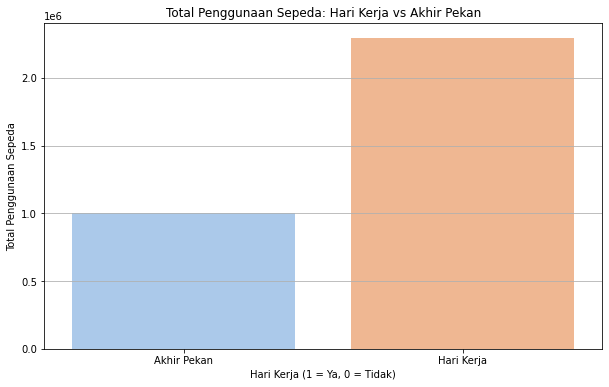

In [92]:
# Menghitung total penggunaan sepeda berdasarkan 'workingday_day'
daily_usage = combined_data.groupby('workingday_day')['cnt_hour'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_usage, x='workingday_day', y='cnt_hour', palette='pastel')
plt.title('Total Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (1 = Ya, 0 = Tidak)')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'], rotation=0)
plt.grid(axis='y')
plt.show()

Visualisasi Penggunaan Sepeda Per Jam

Selanjutnya, kita akan membandingkan pola penggunaan sepeda selama jam-jam tertentu dalam sehari untuk hari kerja dan akhir pekan.

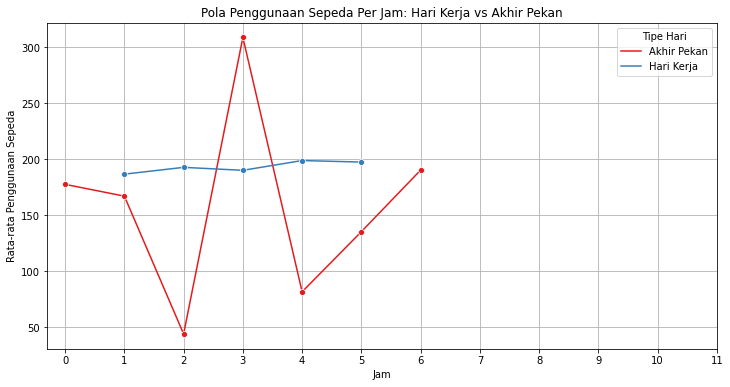

In [93]:
# Menambahkan kolom untuk menunjukkan apakah jam tersebut adalah hari kerja atau akhir pekan
combined_data['day_type'] = combined_data['workingday_day'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Menghitung rata-rata penggunaan sepeda per jam berdasarkan tipe hari
hourly_usage = combined_data.groupby(['weekday_hour', 'day_type'])['cnt_hour'].mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_usage, x='weekday_hour', y='cnt_hour', hue='day_type', marker='o', palette='Set1')
plt.title('Pola Penggunaan Sepeda Per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.xticks(range(0, 12))
plt.grid()
plt.legend(title='Tipe Hari')
plt.show()

**Pertanyaan 2:**

Visualisasi Pengaruh Suhu dan Cuaca

Kita akan menggunakan scatter plot untuk melihat hubungan antara suhu (temp_hour) dan jumlah pengguna sepeda (cnt_hour) serta membedakannya berdasarkan jenis hari (hari kerja vs akhir pekan).

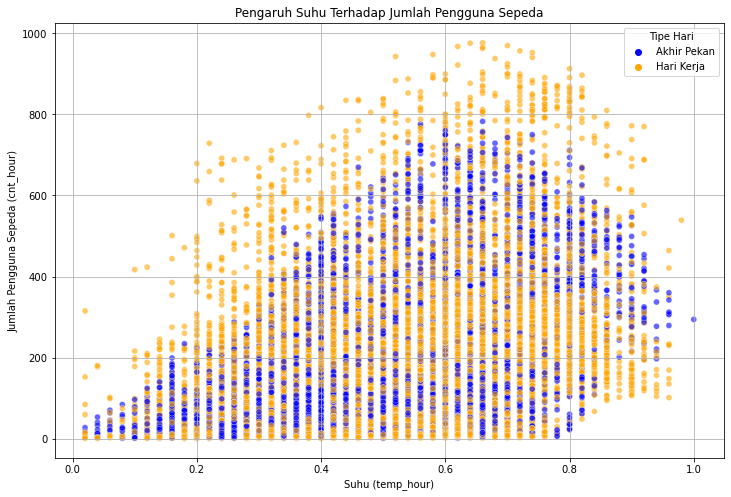

In [94]:
# Mengatur warna untuk masing-masing jenis hari
palette = {'Akhir Pekan': 'blue', 'Hari Kerja': 'orange'}

# Membuat visualisasi scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_data, x='temp_hour', y='cnt_hour', hue='day_type', palette=palette, alpha=0.6)
plt.title('Pengaruh Suhu Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (temp_hour)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt_hour)')
plt.grid()
plt.legend(title='Tipe Hari')
plt.show()

Visualisasi Pengaruh Cuaca

Selanjutnya, kita akan menggunakan box plot untuk melihat distribusi jumlah pengguna sepeda berdasarkan kategori cuaca (weathersit_day).

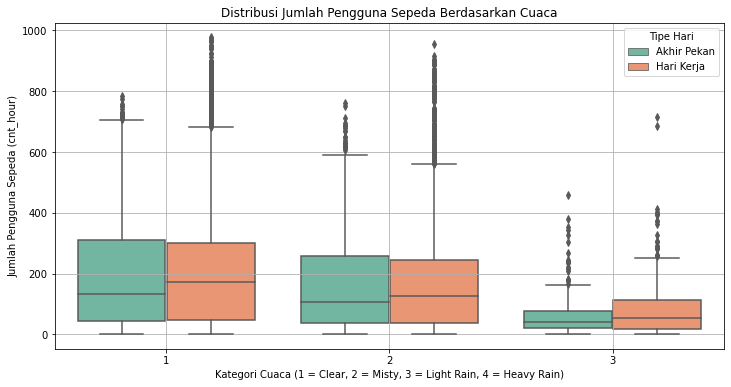

In [95]:
# Membuat visualisasi box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='weathersit_day', y='cnt_hour', hue='day_type', palette='Set2')
plt.title('Distribusi Jumlah Pengguna Sepeda Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca (1 = Clear, 2 = Misty, 3 = Light Rain, 4 = Heavy Rain)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt_hour)')
plt.grid()
plt.legend(title='Tipe Hari')
plt.show()

# Analisis Lanjutan

**Pertanyaan 1:**

Hitung Rata-rata Pengguna Sepeda per Hari

Kita akan menghitung rata-rata jumlah pengguna sepeda per hari untuk hari kerja dan akhir pekan.

In [96]:
# Menghitung rata-rata pengguna sepeda per hari
avg_daily_usage = combined_data.groupby('day_type')['cnt_hour'].mean().reset_index()
avg_daily_usage.columns = ['Tipe Hari', 'Rata-rata Pengguna Sepeda']
print(avg_daily_usage)

     Tipe Hari  Rata-rata Pengguna Sepeda
0  Akhir Pekan                 181.405332
1   Hari Kerja                 193.207754


Hitung Jumlah Pengguna Sepeda per Jam

Analisis ini menghitung jumlah total pengguna sepeda berdasarkan jam dalam sehari, dikelompokkan menurut tipe hari.

In [97]:
# Menghitung jumlah total pengguna sepeda per jam
hourly_usage = combined_data.groupby(['hr', 'day_type'])['cnt_hour'].sum().reset_index()
hourly_usage.columns = ['Jam', 'Tipe Hari', 'Total Pengguna Sepeda']
print(hourly_usage)

    Jam    Tipe Hari  Total Pengguna Sepeda
0     0  Akhir Pekan                  20884
1     0   Hari Kerja                  18246
2     1  Akhir Pekan                  15987
3     1   Hari Kerja                   8177
4     2  Akhir Pekan                  12123
5     2   Hari Kerja                   4229
6     3  Akhir Pekan                   5851
7     3   Hari Kerja                   2323
8     4  Akhir Pekan                   1876
9     4   Hari Kerja                   2552
10    5  Akhir Pekan                   1929
11    5   Hari Kerja                  12332
12    6  Akhir Pekan                   4292
13    6   Hari Kerja                  50840
14    7  Akhir Pekan                  10027
15    7   Hari Kerja                 144144
16    8  Akhir Pekan                  24406
17    8   Hari Kerja                 236595
18    9  Akhir Pekan                  39645
19    9   Hari Kerja                 119793
20   10  Akhir Pekan                  59115
21   10   Hari Kerja            

Perbandingan Pengguna Sepeda antara Hari Kerja dan Akhir Pekan

Analisis ini akan menunjukkan perbandingan antara total pengguna sepeda pada hari kerja dan akhir pekan.

In [98]:
# Menghitung total pengguna sepeda untuk hari kerja dan akhir pekan
total_usage_comparison = combined_data.groupby('day_type')['cnt_hour'].sum().reset_index()
total_usage_comparison.columns = ['Tipe Hari', 'Total Pengguna Sepeda']
print(total_usage_comparison)

     Tipe Hari  Total Pengguna Sepeda
0  Akhir Pekan                1000269
1   Hari Kerja                2292410


**Pertanyaan 2:**

Rata-rata Pengguna Sepeda Berdasarkan Cuaca

Kita akan menghitung rata-rata jumlah pengguna sepeda berdasarkan kategori cuaca (weathersit_day), dikelompokkan menurut tipe hari.

In [100]:
# Menghitung rata-rata pengguna sepeda berdasarkan kategori cuaca
avg_usage_by_weather = combined_data.groupby(['weathersit_day', 'day_type'])['cnt_hour'].mean().reset_index()
avg_usage_by_weather.columns = ['Kategori Cuaca', 'Tipe Hari', 'Rata-rata Pengguna Sepeda']
print(avg_usage_by_weather)

   Kategori Cuaca    Tipe Hari  Rata-rata Pengguna Sepeda
0               1  Akhir Pekan                 192.162728
1               1   Hari Kerja                 210.817113
2               2  Akhir Pekan                 165.016766
3               2   Hari Kerja                 171.692454
4               3  Akhir Pekan                  75.641667
5               3   Hari Kerja                  82.735632


Analisis Pengaruh Suhu Terhadap Penggunaan Sepeda

Analisis ini menghitung hubungan antara suhu (temp_hour) dan jumlah pengguna sepeda (cnt_hour) dengan mempertimbangkan tipe hari.

In [101]:
# Menghitung korelasi antara suhu dan jumlah pengguna sepeda berdasarkan tipe hari
correlation_temp_usage = combined_data.groupby('day_type').apply(lambda x: x['temp_hour'].corr(x['cnt_hour'])).reset_index()
correlation_temp_usage.columns = ['Tipe Hari', 'Korelasi Suhu dan Pengguna Sepeda']
print(correlation_temp_usage)

     Tipe Hari  Korelasi Suhu dan Pengguna Sepeda
0  Akhir Pekan                           0.515392
1   Hari Kerja                           0.354558


Analisis Rata-rata Pengguna Sepeda Berdasarkan Suhu dan Cuaca

Kita akan menghitung rata-rata jumlah pengguna sepeda berdasarkan suhu dan cuaca, dengan mempertimbangkan jam dalam sehari.

In [102]:
# Menghitung rata-rata pengguna sepeda berdasarkan suhu dan kategori cuaca
avg_usage_by_temp_weather = combined_data.groupby(['temp_hour', 'weathersit_day', 'day_type'])['cnt_hour'].mean().reset_index()
avg_usage_by_temp_weather.columns = ['Suhu', 'Kategori Cuaca', 'Tipe Hari', 'Rata-rata Pengguna Sepeda']
print(avg_usage_by_temp_weather)

     Suhu  Kategori Cuaca    Tipe Hari  Rata-rata Pengguna Sepeda
0    0.02               1  Akhir Pekan                  10.500000
1    0.02               1   Hari Kerja                  26.250000
2    0.02               2   Hari Kerja                  77.714286
3    0.04               1  Akhir Pekan                  18.909091
4    0.04               1   Hari Kerja                  59.666667
..    ...             ...          ...                        ...
226  0.94               2   Hari Kerja                 104.000000
227  0.96               1  Akhir Pekan                 317.833333
228  0.96               1   Hari Kerja                 248.500000
229  0.98               1   Hari Kerja                 539.000000
230  1.00               1  Akhir Pekan                 294.000000

[231 rows x 4 columns]


# Conclusion

**Pertanyaan 1:**

Analisis pola penggunaan sepeda menunjukkan bahwa jumlah pengguna sepeda lebih tinggi pada hari kerja, terutama selama jam sibuk pagi dan sore, mencerminkan penggunaannya sebagai moda transportasi. Sementara itu, pada akhir pekan, penggunaan sepeda meningkat secara signifikan di siang dan sore hari, menandakan penggunaannya untuk rekreasi. Temuan ini menyiratkan perlunya peningkatan layanan dan infrastruktur sepeda, seperti penyediaan armada yang lebih banyak pada jam sibuk hari kerja dan pengembangan fasilitas yang mendukung penggunaan sepeda di akhir pekan.

**Pertanyaan 2:**

Analisis menunjukkan bahwa cuaca dan suhu memiliki pengaruh signifikan terhadap jumlah pengguna sepeda, dengan suhu yang lebih tinggi berhubungan positif dengan peningkatan pengguna di jam-jam tertentu. Pada hari kerja, jumlah pengguna sepeda cenderung lebih tinggi pada hari cerah dibandingkan dengan hari hujan, sementara pada hari libur, pengguna sepeda lebih terpengaruh oleh kondisi cuaca yang baik untuk aktivitas rekreasi. Hasil ini menegaskan pentingnya mempertimbangkan faktor cuaca dalam perencanaan promosi dan fasilitas untuk meningkatkan penggunaan sepeda, khususnya pada hari-hari dengan cuaca yang mendukung.